In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [4]:
with open('new_task/new_task/final_output_part2__.json', 'r') as file:
    d2 = json.load(file)

In [5]:
with open('new_task/new_task/final_output.json', 'r') as file:
    d1 = json.load(file)

In [6]:
d3 = d1 + d2

In [7]:
len(d3)

1200

In [42]:
with open('new_task/new_task/evidence_corpus.json', 'r', encoding='utf-8') as f:
    evidence_data = json.load(f)
print(len(evidence_data))

8096


In [8]:
dfcol = ['news', 'ground truth', 'prediction', 'reason']

In [9]:
df = pd.DataFrame(columns= dfcol)

In [10]:
j = 0
import random
random_selects = random.sample(d3, k=10)
for i in random_selects:
    print(j)
#     print(i['news'],end='\n')
#     print(i['prediction'],end='\n')
#     print(i['reason'],end='\n\n')
    print(i)
    new = {'news': i['news'], 'ground truth': i['ground truth'], 'prediction': i['prediction'], 'reason' : i['reason']}
    new_df = pd.DataFrame([new])
    df = pd.concat([df, new_df], ignore_index=True)
    j+=1
#     break

0
{'news': 'A recent study reveals that colorectal cancer screening has been delayed as a result of the COVID-19 pandemic. The research also highlights that factors such as distance from treatment facilities and insurance coverage play a role in these delays.', 'evidence list': ['2jf7z9u2', 'kb8pohri', 'lcry2tq4'], 'ground truth': 1, 'prediction': 'True', 'reason': 'The evidence abstracts support the point of view in the news paragraph. Abstract 1 mentions that colorectal cancer screening rates have decreased during the COVID-19 pandemic. Abstract 2 states that distance from treatment facilities can lead to delays in cancer screening. Abstract 3 highlights that lack of insurance coverage can also contribute to screening delays. Therefore, the news paragraph is factually true.'}
1
{'news': "Microbiologist Kevin McKernan has discovered significant DNA contamination in Pfizer's and Moderna's bivalent COVID booster shots, raising concerns about potential DNA alteration and increased cancer

In [11]:
df

,news,ground truth,prediction,reason
0,A recent study reveals that colorectal cancer ...,1,True,The evidence abstracts support the point of vi...
1,Microbiologist Kevin McKernan has discovered s...,0,False,The evidence abstracts do not support the clai...
2,A recent German study conducted by scientists ...,0,False,The evidence abstracts contradict the news par...
3,A new Covid variant with more mutations than a...,0,False,The news paragraph claims that a new Covid var...
4,Teachers experienced higher levels of anxiety ...,1,True,The evidence abstracts support the news paragr...
5,"Australia's drug regulator, the Therapeutic Go...",0,True,The evidence abstracts do not provide any info...
6,A UK study suggests that a single dose of the ...,1,True,The evidence abstracts support the news paragr...
7,"According to an article titled ""COVID Boosters...",0,False,The evidence abstracts do not support the clai...
8,Researchers from Griffith University and South...,1,True,The evidence abstracts do not provide any cont...
9,The Centers for Disease Control and Prevention...,1,True,The evidence abstracts support the central cla...


In [12]:
df.to_csv('top_20.csv')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
paragraph1 = i['news']
paragraph2 = i['reason']

In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([paragraph1, paragraph2])

In [16]:
cosine_sim = cosine_similarity(X)

In [17]:
print("Cosine Similarity between paragraph1 and paragraph2:", cosine_sim[0][1])

Cosine Similarity between paragraph1 and paragraph2: 0.6480985730855853


In [18]:
cosine_sim

array([[1.        , 0.64809857],
       [0.64809857, 1.        ]])

In [19]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

In [21]:
news_embedding = model.encode(i['news'])
evidence_embeddings = model.encode(i['reason'])

In [22]:
# pip install sentence_transformers

In [23]:
evidence_embeddings.shape

(768,)

In [24]:
similarities = cosine_similarity([news_embedding, evidence_embeddings])

# Print similarity scores
# for i, sentence in enumerate(i['reason']):
print(f"Similarity with reason : {similarities}")

Similarity with reason : [[1.0000001 0.4928583]
 [0.4928583 1.0000001]]


In [25]:
similarities[0][1]

0.4928583

In [26]:
import tqdm as tqdm

In [51]:
sem_sim = []
for i in tqdm.tqdm(d3):
#     print(i['news'],end='\n\n')
#     print(i['prediction'],end='\n\n')
#     print(i['reason'],end='\n\n')
    
    news_embedding = model.encode(i['news'])
#     evidence_embeddings = model.encode(i['reason'])

    evidence_list = []
    if type(i['evidence list'])==str:
        evidence_list.append(i['evidence list'])
    else:
        evidence_list.extend(i['evidence list'])
    #     print(f"evidence list: {evidence_list}")

    evidence = [it['abstract'] for it in evidence_data if it['cord_uid'] in evidence_list]
    if evidence:
        evidence = evidence[0]
    else:
        evidence = ""

    evidence_embeddings = model.encode(evidence)
    
    similarities = cosine_similarity([news_embedding, evidence_embeddings])
    sem_dict = dict()
    sem_dict[i['prediction']] = similarities[0][1]
    sem_sim.append(sem_dict)
    
    
#     break

100%|██████████| 1200/1200 [05:25<00:00,  3.68it/s]


In [48]:
evidence

'SARS-CoV-2, the virus that causes coronavirus disease 2019 (COVID-19), is transmitted predominantly by respiratory droplets generated when infected persons cough, sneeze, spit, sing, talk, or breathe. CDC recommends community use of face masks to prevent transmission of SARS-CoV-2 (1). As of October 22, 2020, statewide mask mandates were in effect in 33 states and the District of Columbia (2). This study examined whether implementation of statewide mask mandates was associated with COVID-19-associated hospitalization growth rates among different age groups in 10 sites participating in the COVID-19-Associated Hospitalization Surveillance Network (COVID-NET) in states that issued statewide mask mandates during March 1-October 17, 2020. Regression analysis demonstrated that weekly hospitalization growth rates declined by 2.9 percentage points (95% confidence interval [CI] = 0.3-5.5) among adults aged 40-64 years during the first 2 weeks after implementing statewide mask mandates. After m

In [49]:
len(sem_sim)

1

In [50]:
sem_sim

[{'False': 0.60537523}]

In [54]:
true_sem_sim = []
false_sem_sim = []

In [55]:
for i in sem_sim:
    if list(i.items())[0][0] == 'False':
        false_sem_sim.append(list(i.items())[0][1])
    elif list(i.items())[0][0] == 'True':
        true_sem_sim.append(list(i.items())[0][1])
#     break

In [56]:
true_sem_sim

[0.54052234,
 0.49264437,
 0.48103318,
 0.50513375,
 0.4299101,
 0.3748554,
 0.65602154,
 0.56972766,
 0.44159055,
 0.5139205,
 0.5831717,
 0.41062957,
 0.47551244,
 0.3278129,
 0.46359843,
 0.30810013,
 0.6359079,
 0.5466408,
 0.42341623,
 0.39264977,
 0.5828238,
 0.6017249,
 0.3980717,
 0.53545505,
 0.34131622,
 0.4720588,
 0.6655975,
 0.6765434,
 0.6024692,
 0.39744815,
 0.7288958,
 0.36747533,
 0.6022551,
 0.5389053,
 0.37221417,
 0.2581844,
 0.4988731,
 0.56733525,
 0.49547547,
 0.51750946,
 0.5520324,
 0.5552429,
 0.54188097,
 0.39270267,
 0.48538497,
 0.47682118,
 0.4143172,
 0.5090825,
 0.54227084,
 0.57828593,
 0.44831043,
 0.5024478,
 0.5972044,
 0.42306542,
 0.66450125,
 0.38250148,
 0.47373444,
 0.50245196,
 0.38266224,
 0.50323486,
 0.5305356,
 0.24999422,
 0.4946488,
 0.36273018,
 0.43733037,
 0.6703179,
 0.6564345,
 0.2618593,
 0.59143364,
 0.6892094,
 0.5174217,
 0.56121206,
 0.61903703,
 0.5094801,
 0.2639205,
 0.64793617,
 0.5527674,
 0.5641626,
 0.57708895,
 0.710935

In [57]:
false_sem_sim

[0.60537523,
 0.26039836,
 0.33281326,
 0.43661863,
 0.6599912,
 0.44336393,
 0.6540824,
 0.38218942,
 0.5800761,
 0.67598534,
 0.71228194,
 0.549529,
 0.23493719,
 0.2705871,
 0.4002418,
 0.34387589,
 0.54236823,
 0.4221775,
 0.46351805,
 0.42922956,
 0.3834532,
 0.5537655,
 0.49803802,
 0.42257774,
 0.67311805,
 0.4710124,
 0.3347171,
 0.47181898,
 0.30876112,
 0.37552375,
 0.44828567,
 0.59701306,
 0.48152864,
 0.59324646,
 0.4275641,
 0.3601308,
 0.35690856,
 0.5753621,
 0.33918825,
 0.4141891,
 0.55075765,
 0.53976226,
 0.49710864,
 0.28078952,
 0.15549737,
 0.444829,
 0.30421406,
 0.3911603,
 0.50095797,
 0.45843205,
 0.4583627,
 0.56240463,
 0.4556947,
 0.54194045,
 0.41338384,
 0.3385016,
 0.44300872,
 0.52877176,
 0.40010178,
 0.23231147,
 0.413203,
 0.487155,
 0.3491962,
 0.32964498,
 0.5232169,
 0.47516626,
 0.39857486,
 0.3926621,
 0.40026912,
 0.5228387,
 0.3658362,
 0.43172038,
 0.6308268,
 0.09057089,
 0.5104189,
 0.3170238,
 0.4005653,
 0.49839976,
 0.34705144,
 0.39937

In [58]:
len(true_sem_sim)

655

In [59]:
np.sqrt(545)

23.345235059857504

In [60]:
len(false_sem_sim)

544

In [61]:
print(f"Average value: {np.mean(true_sem_sim)}")

Average value: 0.5091412663459778


In [62]:
print(f"Average value: {np.mean(false_sem_sim)}")

Average value: 0.43981125950813293


In [63]:
os.getcwd()

'C:\\Users\\aishw\\OneDrive\\Desktop\\Research\\Fake Science'

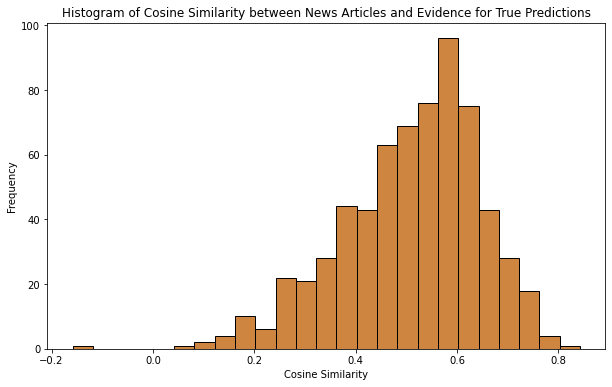

In [66]:
plt.figure(figsize=(10,6))
plt.hist(true_sem_sim, bins=25, edgecolor = 'black', color='peru')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between News Articles and Evidence for True Predictions')
plt.savefig('Cosine_Similarity_News_and_REvidence_True.png')
plt.show()

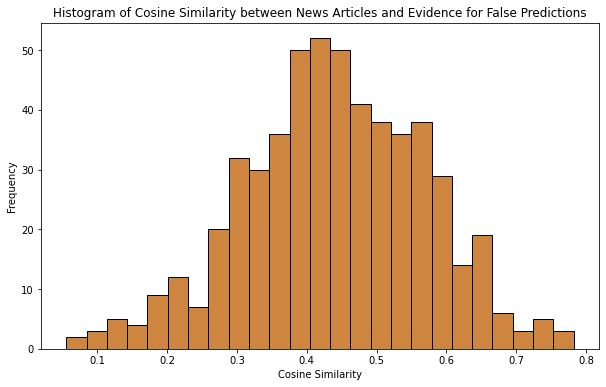

In [67]:
plt.figure(figsize=(10,6))
plt.hist(false_sem_sim, bins=25, edgecolor = 'black', color='peru')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between News Articles and Evidence for False Predictions')
plt.savefig('Cosine_Similarity_News_and_Evidence_False.png')
plt.show()